<h1>Adaline SGD Classified </h1>

In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


class AdalineSGD:
    """
    ADaptive LInear NEuron Classifier

    Utilizing Stochastic gradient Descent

    Parameters
    eta : float 
        Learning rate between 0.0 < eta < 1.0 non inclusive
    ephochs : int
        Number of iterations
    random_state : int
        seed for generating randome results
    shuffle : bool
        option to shuffle the data each epoch to prevent cycles
    """
    def __init__(self, eta = 0.1 , epochs = 15, random_state = None, shuffle = True):
        self.eta = eta 
        self.epochs = epochs
        self.random_state = random_state
        self.shuffle = shuffle

    def fit(self,X,y):
        """
        X : {array like} shape [n_features,n_cols] = [n x m]
        y : {array like} shale [n_features,1] = (n x 1)
        """
        self._initialize_weights(X.shape[1])
        self.losses_ = [] #keep track of avg loss per epoch
        for i in range(self.epochs):
            if self.shuffle:
                #do shuffling
                X, y = self._shuffle(X,y)
            loss = [] #keeps track of all losses for every point 
            for xi , target in zip(X,y):
                individual_loss = self._update_weights(xi,target)
                loss.append(individual_loss)
            avg_loss = np.mean(loss)
            self.losses_.append(avg_loss)
        return self
    
    def partial_fit(self,X,y):
        """
        Fit training data without reintializing weights
        """
        if not self.w_initialized:
            self._initialize_weights(X.shape[1])
        if y.ravel().shape[0] > 1:
            for xi,target in zip(X,y):
                self._update_weights(xi,target)
        else:
            self._update_weights(X,y)
        return self



    def _update_weights(self,xi,target):
        res = self._activation(self._net_input(xi))
        error = (target - res)
        self.w += self.eta * 2.0 * error * xi
        self.b += self.eta * 2.0 * error
        loss = error * error
        return loss
    

    def _net_input(self,X):
        #Linear algebra representation of y = w.Tx + b
        return np.dot(X,self.w) + self.b
    
    def _activation(self,X):
        return X
    
    def _predict(self,X):
        return np.where(self._activation(self._net_input(X)) >= 0.5,1,0)
    
    def __repr__(self):
        return f"AdaSGD Model with params eta : {self.eta}, epochs : {self.epochs}, random_state : {self.random_state}"

    def _initialize_weights(self,m):
        """
        Parameters

        m : int
            length of weight vector 
        """
        self.rgen = np.random.RandomState(self.random_state)
        self.w = self.rgen.normal(loc = 0.0,scale = 0.01,size = m)
        self.b = float(0)
        self.w_initialized = True
        
    def _shuffle(self,X,y):
        r = self.rgen.permutation(X.shape[0])
        return X[r],y[r]

<h1>Train and plot model <h1>

In [80]:
def plot_descision_reigons(X,y,classifier):
    markers = ['o','s']
    colors = ['red','blue']

    for idx,cl in enumerate(np.unique(y)):
        plt.scatter(
            x = X[y == cl,0], #plot x (feature 1) 1 class at a time
            y = X[y == cl,1], #plot y (feature 2) 1 class at a time
            c = colors[idx],
            marker = markers[idx],
            label = cl,
            edgecolor="black"
        )
    x_min , x_max = np.min(X[:,0]) - 1 , np.max(X[:,0]) + 1

    y1 = -(classifier.w[0]*x_min + classifier.b)/classifier.w[1]
    y2 = -(classifier.w[0]*x_max + classifier.b)/classifier.w[1]

    plt.plot([x_min,x_max],[y1,y2],'b-')
    plt.xlim(x_min, x_max)
    plt.ylim(X[:, 1].min() - 1, X[:, 1].max() + 1)
    plt.xlabel('Sepal length [standardized]')
    plt.ylabel('Petal length [standardized]')
    plt.legend(loc='upper left')

   sepal.length  sepal.width  petal.length  petal.width variety
0           5.1          3.5           1.4          0.2  Setosa
1           4.9          3.0           1.4          0.2  Setosa
2           4.7          3.2           1.3          0.2  Setosa
3           4.6          3.1           1.5          0.2  Setosa
4           5.0          3.6           1.4          0.2  Setosa
5           5.4          3.9           1.7          0.4  Setosa
6           4.6          3.4           1.4          0.3  Setosa
7           5.0          3.4           1.5          0.2  Setosa
8           4.4          2.9           1.4          0.2  Setosa
9           4.9          3.1           1.5          0.1  Setosa


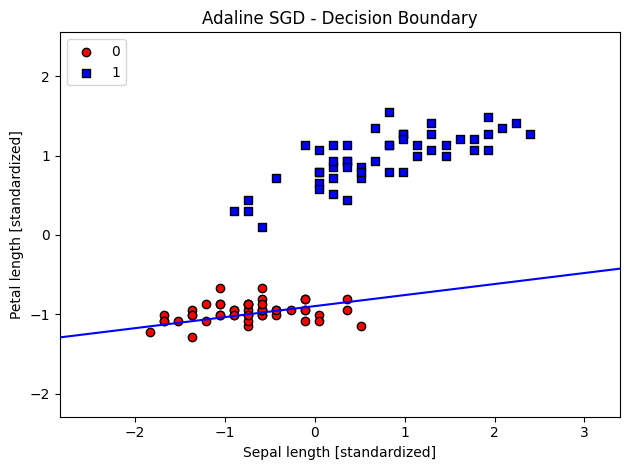

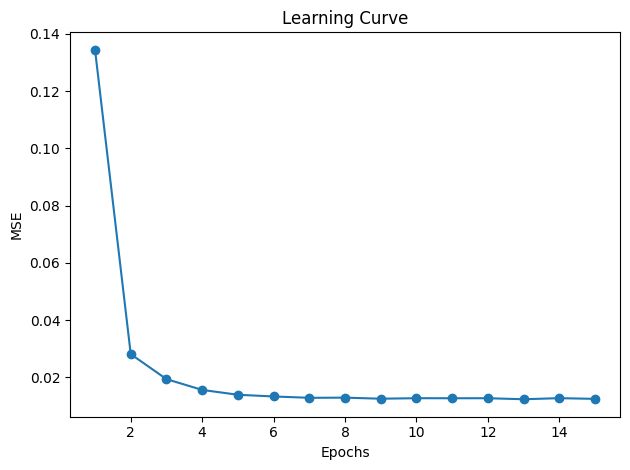

In [81]:
iris_data = pd.read_csv("../../iris_data.csv")
print(iris_data.head(10))
y = iris_data.iloc[0:100,4]
y = np.where(y == 'Setosa',0,1)
X = iris_data.iloc[0:100,[0,2]].astype(float)
#Standardize X 
X_std = np.copy(X)
X_std[:,0] = (X_std[:,0] - np.mean(X_std[:,0]))/np.std(X_std[:,0])
X_std[:,1] = (X_std[:,1]-  np.mean(X_std[:,1]))/np.std(X_std[:,1])


adasgd = AdalineSGD(epochs = 15,eta = 0.01,random_state=1)

adasgd.fit(X_std,y)

plot_descision_reigons(X_std,y,classifier=adasgd)
plt.title('Adaline SGD - Decision Boundary')
plt.tight_layout()
plt.show()

# Also plot the learning curve
plt.figure()
plt.plot(range(1, len(adasgd.losses_) + 1), adasgd.losses_, marker='o')
plt.title('Learning Curve')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.tight_layout()
plt.show()
